<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [180]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

Импорт библиотек

In [181]:
df = pd.read_csv('/datasets/Churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Первичное ознакомление с данными

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Первичное ознакомление с данными. В столбце Tenure пропущено 9% данных. Наиболее вероятной причиной является их отсутствие. Пропуски можно заменить средними значениями поскольку значения столбца могут находиться в ограниченном диапазоне значений. Также в признак в столбце Surname является категориальным, его нужно будет превратить в количественный

In [183]:
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропущенные значения заменены средними

In [184]:
df['Exited'].value_counts(normalize=len(df['RowNumber']))

0    0.7963
1    0.2037
Name: Exited, dtype: float64

Имеет место определенный дисбаланс классов. На каждого ушедшего клиента приходится четыре оставшихся

<AxesSubplot:>

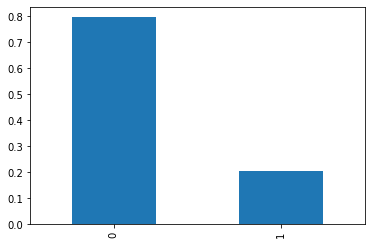

In [185]:
df['Exited'].value_counts(normalize=len(df['RowNumber'])).plot(kind='bar')

## Исследование задачи

In [186]:
features = df.drop(['RowNumber', 'Exited', 'Surname', 'CustomerId'], axis=1)
target = df['Exited']

Выделены признаки и целевой признак

In [187]:
features.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10


In [188]:
features = pd.get_dummies(features, drop_first=True)
features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,1,0


In [189]:
features.shape

(10000, 11)

Категориальные признаки преобразованы в количественные методом One Hot Encoding

In [190]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=12345)
features_train.shape

(6000, 11)

Создана тестовая выборка в рекомендованном размере - 60% общей

In [191]:
features_test, features_valid, target_test, target_valid = train_test_split(features_valid, target_valid, test_size=0.5, random_state=12345)
features_valid.shape

(2000, 11)

Создана валидационная выборка в рекомендованном размере - 20% общей

In [192]:
features_test.shape

(2000, 11)

Создана тестовая выборка в рекомендованном размере - 20% общей

In [193]:
best_tree = 0
best_depth = 0
for depth in range(1,51):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_tree:
        best_tree = result
        best_depth = depth
print('Максимальный показатель f1 в', best_tree, 'достигается при глубине дерева', best_depth)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Максимальный показатель f1 в 0.5359877488514548 достигается при глубине дерева 6
Показатель auc roc = 0.6682669460971921


Максимально достижимый показатель для дерева решений составляет 0.53

In [194]:
best_forest = 0
for est in range(1, 91):
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_forest:
        best_forest = result
        best_est = est
print('Максимальный показатель f1 в', best_forest, 'достигается при глубине дерева', best_est)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Максимальный показатель f1 в 0.5625 достигается при глубине дерева 89
Показатель auc roc = 0.8490228176610886


Максимально достижимый показатель для случайного леса составляет 0.56 Обучение проводилось в 
диапазоне (1, 301), который по получении результата был заменен на (1, 91) для ускорения выполнения
кода 

In [195]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
regression = f1_score(target_valid, predictions_valid)
print('Показатель f1', regression)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Показатель f1 0.13441955193482688
Показатель auc roc = 0.6407713721627831


Логистическая регрессия дает существенно худший результат, f1 составляет всего 0.13 Следующим шагом будут применены различные способы борьбы с дисбалансом классов для достижения целевого показателя f1 в 0.59

## Борьба с дисбалансом

In [196]:
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
regression_balanced = f1_score(target_valid, predictions_valid)
print('Показатель f1', regression_balanced)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Показатель f1 0.42834394904458606
Показатель auc roc = 0.6856646443931755


Для логистической регрессии взвешивание классов привело к существенному росту как f1, так и auc roc. Тем не менее f1 по-прежнему ниже целевого значения

In [197]:
best_forest_balanced = 0
for est in range(1, 91):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_forest_balanced:
        best_forest_balanced = result
        best_est = est
print('Максимальный показатель f1 в', best_forest_balanced, 'достигается при глубине дерева', best_est)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Максимальный показатель f1 в 0.5382262996941896 достигается при глубине дерева 83
Показатель auc roc = 0.8537561968666004


Максимально достижимый показатель для случайного леса составляет 0.53 Взвешивание классов привело к 
уменьшению показателя. Обучение проводилось в диапазоне (1, 501), который по получении результата был 
заменен на (1, 91) для ускорения выполнения кода. 

In [198]:
best_tree_balanced = 0
best_depth_balanced = 0
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_tree_balanced:
        best_tree_balanced = result
        best_depth_balanced = depth
print('Максимальный показатель f1 в', best_tree_balanced, 'достигается при глубине дерева', best_depth_balanced)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Максимальный показатель f1 в 0.5809128630705395 достигается при глубине дерева 5
Показатель auc roc = 0.7510377456072892


Обучение проводилось в диапазоне (1, 101), который по получении результата был заменен на (1, 11) для ускорения выполнения кода. Включение взвешивания классов для дерева решений ведет к росту f1 до 0.58. При этом показатель auc roc не меняется. Следующим методом борьбы с дисбалансом классов будет увеличение выборки

In [199]:
def upsample (features, target, repeat):
    features_zeros = features[target==0]
    features_ones = features[target==1]
    target_zeros = target[target==0]
    target_ones = target[target==1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [200]:
best_tree_upsampled = 0
best_depth_upsampled = 0
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_tree_upsampled:
        best_tree_upsampled = result
        best_depth_upsampled = depth
print('Максимальный показатель f1 в', best_tree_upsampled, 'достигается при глубине дерева', best_depth_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Максимальный показатель f1 в 0.5809128630705395 достигается при глубине дерева 5
Показатель auc roc = 0.7509635406126184


In [201]:
display(best_tree_balanced-best_tree_upsampled)

0.0

Дерево решений с увеличением выборки меньшего класса в 4 раза (соотношение ~50/50) не меняет показатели f1 и auc roc. Применим аналогичный подход к случайному лесу

In [202]:
best_forest_upsampled = 0
for est in range(1, 101):
    model = RandomForestClassifier(random_state=12345, n_estimators=est, class_weight='balanced')
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_forest_upsampled:
        best_forest_upsampled = result
        best_est = est
print('Максимальный показатель f1 в', best_forest_upsampled, 'достигается при глубине дерева', best_est)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:,1]
print('Показатель auc roc =', roc_auc_score(target_valid, probabilities_one_valid))

Максимальный показатель f1 в 0.5885416666666666 достигается при глубине дерева 81
Показатель auc roc = 0.8471796855207318


Случайный лес со взвешиванием классом и коэффициентом upsampling 4 дает наилучший показатель f1 в 0.588 среди всех использованных вариантов. Эта модель будет применена к тестовой выборке

## Тестирование модели

In [203]:
model = RandomForestClassifier(random_state=12345, n_estimators=15, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predictions_test = model.predict(features_test)
result = f1_score(target_test, predictions_test)
print('Максимальный показатель f1 в', result)
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:,1]
print('Показатель auc roc =', roc_auc_score(target_test, probabilities_one_test))

Максимальный показатель f1 в 0.6025316455696201
Показатель auc roc = 0.8279205656942034


Целевой показатель f1 в 0.59 на выбранной модели достигнут и превышен 